# 特徴量エンジニアリング（数値特徴量）

In [ ]:
!git clone https://github.com/ironerumi/fe_workshop.git -q -b work
!pip install scikit-learn==0.23.1 -q 
!pip install japanize-matplotlib -q

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
pd.set_option('display.max_columns', 100)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

import seaborn as sns
import japanize_matplotlib
import matplotlib.pyplot as plt
sns.set(font="IPAexGothic")
plt.style.use('ggplot')
%matplotlib inline

from google.colab import files

In [ ]:
# collaboratoryにLendingClub50000.csvをアップロードする。
#uploaded = files.upload() # ローカルからアップロードできるが今回は使用しない。

In [ ]:
# ファイルを読み込む
df = pd.read_csv('fe_workshop/dataset/LendingClub50000.csv')

In [5]:
df.head().T

,0,1,2,3,4
申込ID,1529851,1824764,403548,646411,552526
メンバーID,1793711,2126933,442721,799671,711946
年,2012,2012,2009,2011,2010
月,9,11,5,1,7
ローン申請額,16000,3600,19200,21000,4000
借り入れ目的（大分類）,debt_consolidation,debt_consolidation,wedding,credit_card,other
借り入れ目的（小分類）,Debt Consolidation / Final Wedding Exp,Crush Credit Cards,Consolidate debt and pay for wedding,Wells BofA Credit Card Refi,Debt Consolidation
勤務先,PwC,Morgan Stanley Smith Barney,Aggregate Knowledge,Emerson Process Management,Home Depot
勤続年数,3,2,1,1,1
居住形態,RENT,RENT,RENT,RENT,RENT


## 各標準化手法と対数変換をそれぞれ試して統計量と分布をみてみる

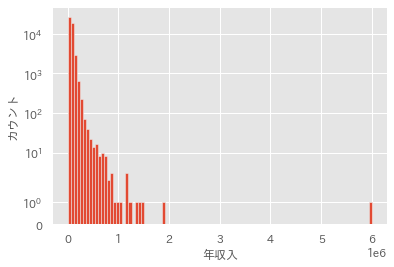

年収入の統計情報：
|       |      年収 |
|:------|----------:|
| count | 49997     |
| mean  | 69308.2   |
| std   | 55756.4   |
| min   |  1896     |
| 25%   | 42000     |
| 50%   | 60000     |
| 75%   | 83400     |
| max   |     6e+06 |

年収入の先頭5行：
|    |   年収 |
|---:|-------:|
|  0 |  90400 |
|  1 |  42500 |
|  2 |  95000 |
|  3 |  85000 |
|  4 |  63500 |


In [6]:
# annual_inc（年収入）の分布をみてみよう
df['年収'].hist(bins=100)
plt.yscale('symlog')
plt.xlabel('年収入')
plt.ylabel('カウント')
plt.show()
print("年収入の統計情報：\n" + df['年収'].describe().apply("{0:.2f}".format).to_markdown())
print("\n年収入の先頭5行：\n" + df['年収'].head().to_markdown())

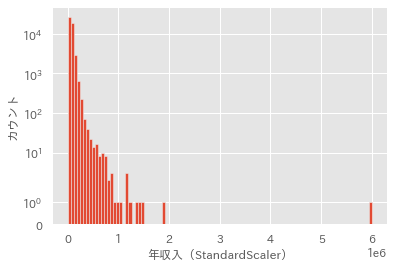

年収入（StandardScaler）の統計情報：
|       |      年収 |
|:------|----------:|
| count | 49997     |
| mean  | 69308.2   |
| std   | 55756.4   |
| min   |  1896     |
| 25%   | 42000     |
| 50%   | 60000     |
| 75%   | 83400     |
| max   |     6e+06 |

年収入（StandardScaler）の先頭5行：
|    |   年収 |
|---:|-------:|
|  0 |  90400 |
|  1 |  42500 |
|  2 |  95000 |
|  3 |  85000 |
|  4 |  63500 |


In [7]:
# StandardScalerの場合
# mean=0, std=1になっているが、分布形状には変化がないことがわかる。
scaler = StandardScaler()
df_temp = df.copy()
df_temp.loc[~df['年収'].isnull(), 'annual_inc'] = scaler.fit_transform(df[['年収']].dropna())
df_temp['年収'].hist(bins=100)

plt.yscale('symlog')
plt.xlabel('年収入（StandardScaler）')
plt.ylabel('カウント')
plt.show()

print("年収入（StandardScaler）の統計情報：\n" + df_temp['年収'].describe().apply("{0:.2f}".format).to_markdown())
print("\n年収入（StandardScaler）の先頭5行：\n" + df_temp['年収'].head().to_markdown())

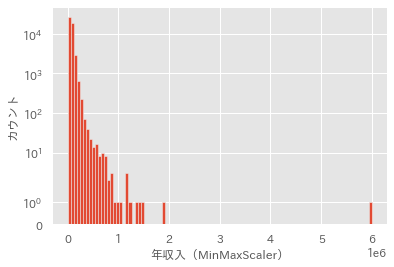

年収入（MinMaxScaler）の統計情報：
|       |      年収 |
|:------|----------:|
| count | 49997     |
| mean  | 69308.2   |
| std   | 55756.4   |
| min   |  1896     |
| 25%   | 42000     |
| 50%   | 60000     |
| 75%   | 83400     |
| max   |     6e+06 |

年収入（MinMaxScaler）の先頭5行：
|    |   年収 |
|---:|-------:|
|  0 |  90400 |
|  1 |  42500 |
|  2 |  95000 |
|  3 |  85000 |
|  4 |  63500 |


In [8]:
# MinMaxScalerの場合
# min=0, max=1になっているが、分布形状には変化がないことがわかる。
scaler = MinMaxScaler()

df_temp = df.copy()
df_temp.loc[~df['年収'].isnull(), 'annual_inc'] = scaler.fit_transform(df[['年収']].dropna())
df_temp['年収'].hist(bins=100)

plt.yscale('symlog')
plt.xlabel('年収入（MinMaxScaler）')
plt.ylabel('カウント')
plt.show()

print("年収入（MinMaxScaler）の統計情報：\n" + df_temp['年収'].describe().apply("{0:.2f}".format).to_markdown())
print("\n年収入（MinMaxScaler）の先頭5行：\n" + df_temp['年収'].head().to_markdown())

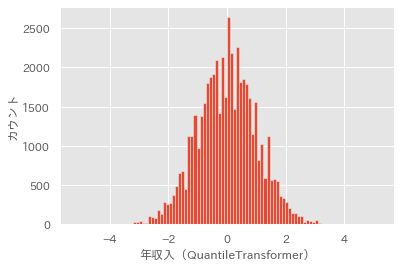

年収入（QuantileTransformer）の統計情報：
|       |     年収 |
|:------|---------:|
| count | 49997    |
| mean  |    -0    |
| std   |     1    |
| min   |    -5.2  |
| 25%   |    -0.67 |
| 50%   |     0.02 |
| 75%   |     0.67 |
| max   |     5.2  |

年収入（QuantileTransformer）の先頭5行：
|    |      年収 |
|---:|----------:|
|  0 |  0.853124 |
|  1 | -0.639462 |
|  2 |  0.92233  |
|  3 |  0.718462 |
|  4 |  0.136473 |


In [9]:
# QuantileTransformer(RankGauss)の場合
# mean=0, std=1になっており、分布形状も正規分布になっている。
scaler = QuantileTransformer(output_distribution='normal')

df_temp = df.copy()
df_temp.loc[~df['年収'].isnull(), '年収'] = scaler.fit_transform(df[['年収']].dropna())
df_temp['年収'].hist(bins=100)

plt.xlabel('年収入（QuantileTransformer）')
plt.ylabel('カウント')
plt.show()

print("年収入（QuantileTransformer）の統計情報：\n" + df_temp['年収'].describe().apply("{0:.2f}".format).to_markdown())
print("\n年収入（QuantileTransformer）の先頭5行：\n" + df_temp['年収'].head().to_markdown())

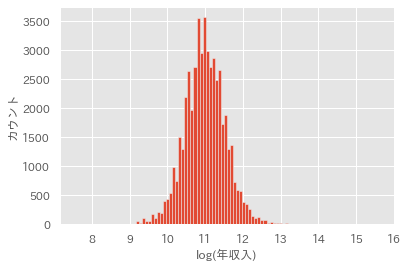

In [10]:
# annual_inc（年収入）は対数正規分布に従うことが知られている。
np.log(df['年収']).hist(bins=100)
plt.xlabel('log(年収入)')
plt.ylabel('カウント')
plt.show()

## 交互作用の明示的な追加

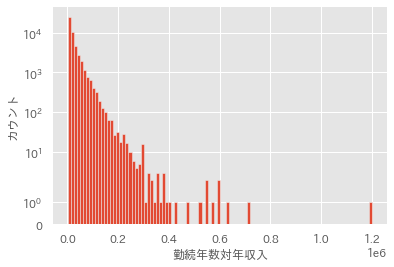

|    |   年収 |   勤続年数 |   勤続年数対年収入 |
|---:|-------:|-----------:|-------------------:|
|  0 |  90400 |          3 |            30133.3 |
|  1 |  42500 |          2 |            21250   |
|  2 |  95000 |          1 |            94999.9 |
|  3 |  85000 |          1 |            84999.9 |
|  4 |  63500 |          1 |            63499.9 |


In [11]:
eps = 1e-6

df['勤続年数対年収入'] = df['年収'] / (df['勤続年数'] + eps)
# 勤続年数と年収入の比率。年数が浅いのに高年収だと能力が高い？
df['勤続年数対年収入'].hist(bins=100)
plt.yscale('symlog')
plt.xlabel('勤続年数対年収入')
plt.ylabel('カウント')
plt.show()
print(df[['年収', '勤続年数', '勤続年数対年収入']].head().to_markdown())

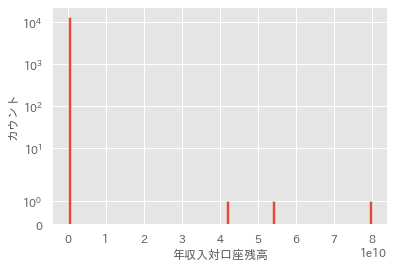

|    |   年収 |   全口座残高 |   年収入対口座残高 |
|---:|-------:|-------------:|-------------------:|
|  0 |  90400 |       164787 |           0.548587 |
|  1 |  42500 |        96627 |           0.439836 |
|  2 |  95000 |          nan |         nan        |
|  3 |  85000 |          nan |         nan        |
|  4 |  63500 |          nan |         nan        |


In [12]:
eps = 1e-6

df['年収入対口座残高'] = df['年収'] / (df['全口座残高'] + eps)
# 年収入と口座残高の比率。貯蓄性向が高い人はコツコツ貯める人なのだから、返済もコツコツできるのでは？
df['年収入対口座残高'].hist(bins=100)
plt.yscale('symlog')
plt.xlabel('年収入対口座残高')
plt.ylabel('カウント')
plt.show()
print(df[['年収', '全口座残高', '年収入対口座残高']].head().to_markdown())

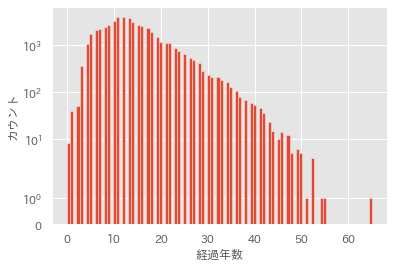

|    | クレジットライン開始   |   経過年数 |
|---:|:-----------------------|-----------:|
|  0 | Oct-2003               |          9 |
|  1 | Dec-2004               |          8 |
|  2 | Mar-1999               |         10 |
|  3 | Jun-1999               |         12 |
|  4 | Oct-2002               |          8 |


In [13]:
start_year = df['クレジットライン開始'].dropna().apply(lambda x: int(x.split('-')[-1]))
df.loc[~df['クレジットライン開始'].isnull(), '経過年数'] = df.loc[~df['クレジットライン開始'].isnull(), '年'] - start_year
# クレジットライン開始日と申請日の差分を計算して、経過年数を算出する。長くサービスを利用している人は安心度が高いのでは？
# 上記ではまずクレジットラインの末尾から西暦を取り出している。
df['経過年数'].hist(bins=100)
plt.yscale('symlog')
plt.xlabel('経過年数')
plt.ylabel('カウント')
plt.show()
print(df[['クレジットライン開始', '経過年数']].head().to_markdown())

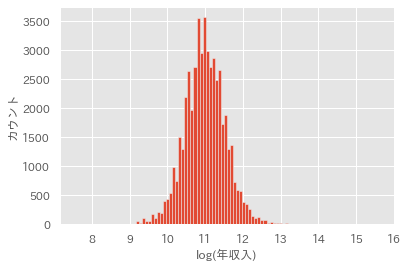

In [14]:
# 変換については、対数変換を採用することとして元データを置換する。
df.loc[~df['年収'].isnull(), '年収'] = np.log(df['年収'].dropna())
df['年収'].hist(bins=100)
plt.xlabel('log(年収入)')
plt.ylabel('カウント')
plt.show()

In [ ]:
df.to_csv('LendingClub50000_num.csv', index=False)

In [ ]:
# ダウンロードしたら、DataRobotでもう一度予測してみよう
files.download('LendingClub50000_num.csv')